The optimal k value (manual method) is: 13


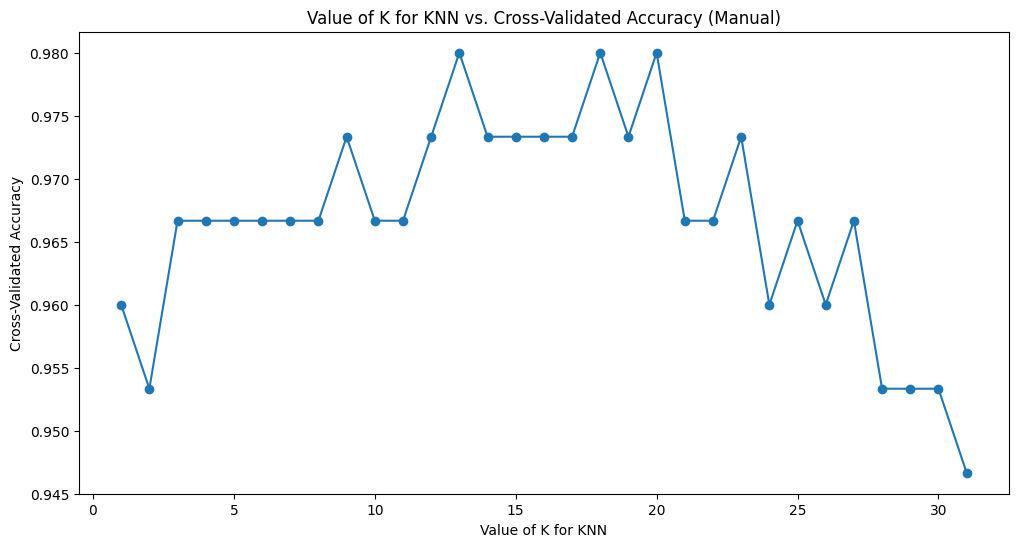

The optimal k value (GridSearchCV) is: 13
Confirmed: k=13 is the optimal value.


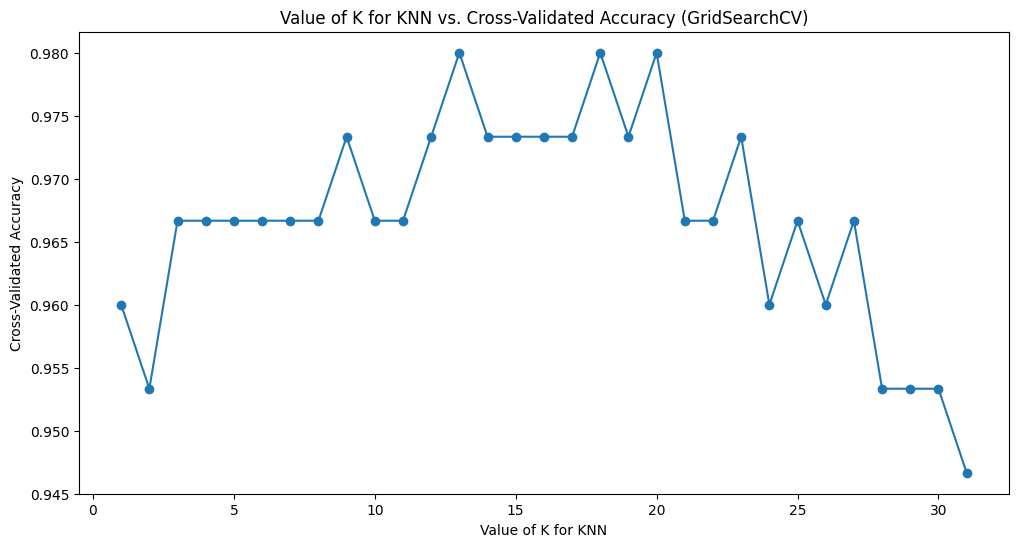

In [6]:
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

# Load the Iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# ----------------------
# Manual KNN optimization
# ----------------------
# Range of k values to test (1 to 31 inclusive)
k_range = range(1, 32)

# Store cross-validation scores
cross_val_scores = []

# Loop over the range of k values
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, y, cv=10)  # 10-fold cross-validation
    cross_val_scores.append(scores.mean())

# Identify the optimal k value
optimal_k_manual = k_range[cross_val_scores.index(max(cross_val_scores))]
print(f"The optimal k value (manual method) is: {optimal_k_manual}")

# Plot the cross-validation scores
plt.figure(figsize=(12, 6))
plt.plot(k_range, cross_val_scores, marker='o', linestyle='-')
plt.xlabel("Value of K for KNN")
plt.ylabel("Cross-Validated Accuracy")
plt.title("Value of K for KNN vs. Cross-Validated Accuracy (Manual)")
plt.show()

# ---------------------
# GridSearchCV optimization
# ---------------------
param_grid = {'n_neighbors': k_range}
knn = KNeighborsClassifier()
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy')
grid.fit(X, y)

# Results from GridSearchCV
optimal_k_grid = grid.best_params_['n_neighbors']
print(f"The optimal k value (GridSearchCV) is: {optimal_k_grid}")

# Confirm that k=13 is the optimal value
if optimal_k_grid == 13:
    print("Confirmed: k=13 is the optimal value.")
else:
    print(f"k=13 is NOT the optimal value. The optimal value is: {optimal_k_grid}")

# Plot the GridSearchCV results
grid_mean_scores = grid.cv_results_['mean_test_score']

plt.figure(figsize=(12, 6))
plt.plot(k_range, grid_mean_scores, marker='o', linestyle='-')
plt.xlabel("Value of K for KNN")
plt.ylabel("Cross-Validated Accuracy")
plt.title("Value of K for KNN vs. Cross-Validated Accuracy (GridSearchCV)")
plt.show()
